# 📌 Problem Statement: Age and Gender Prediction Using Deep Learning  

## 🎯 Objective  
The goal of this project is to **develop a deep learning model** that can accurately **predict a person's age and gender from facial images**.  
This will be achieved using **Convolutional Neural Networks (CNNs)** for feature extraction and classification.  

## 📌 Why is this Important?  
Age and gender prediction has a wide range of applications, including:  
✔ **Personalized Marketing** – Targeted ads based on demographic analysis.  
✔ **Security & Authentication** – Age verification in restricted areas.  
✔ **Healthcare** – Medical diagnosis & patient monitoring.  
✔ **Human-Computer Interaction** – AI-based assistants adapting to user demographics.  

## 📌 Dataset Used  
- **UTKFace Dataset** – A large collection of facial images labeled with **age, gender, and ethnicity**.  

---


### Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

### Load the Dataset

In [2]:
BASE_DIR = "UTKFace"

In [3]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       0
1  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       0
2  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       1
3  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       1
4  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       1

In [5]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

### Exploratory Data Analysis

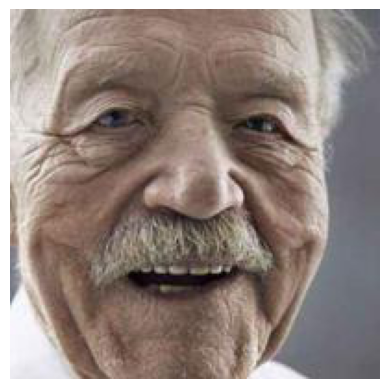

In [6]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<Axes: xlabel='age', ylabel='Density'>

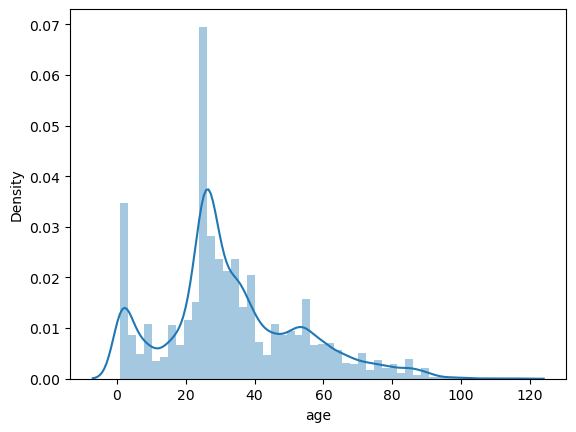

In [7]:
sns.distplot(df['age'])


<Axes: ylabel='count'>

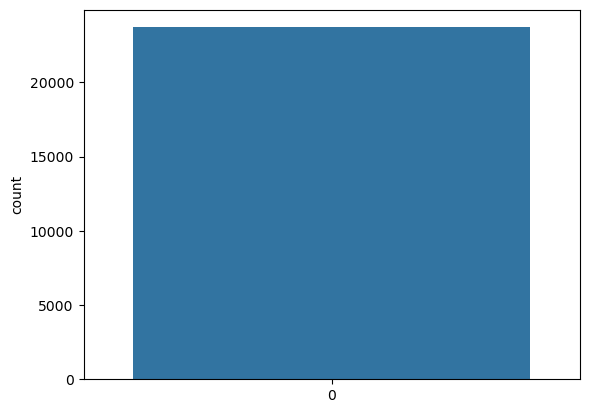

In [8]:
sns.countplot(df['gender'])

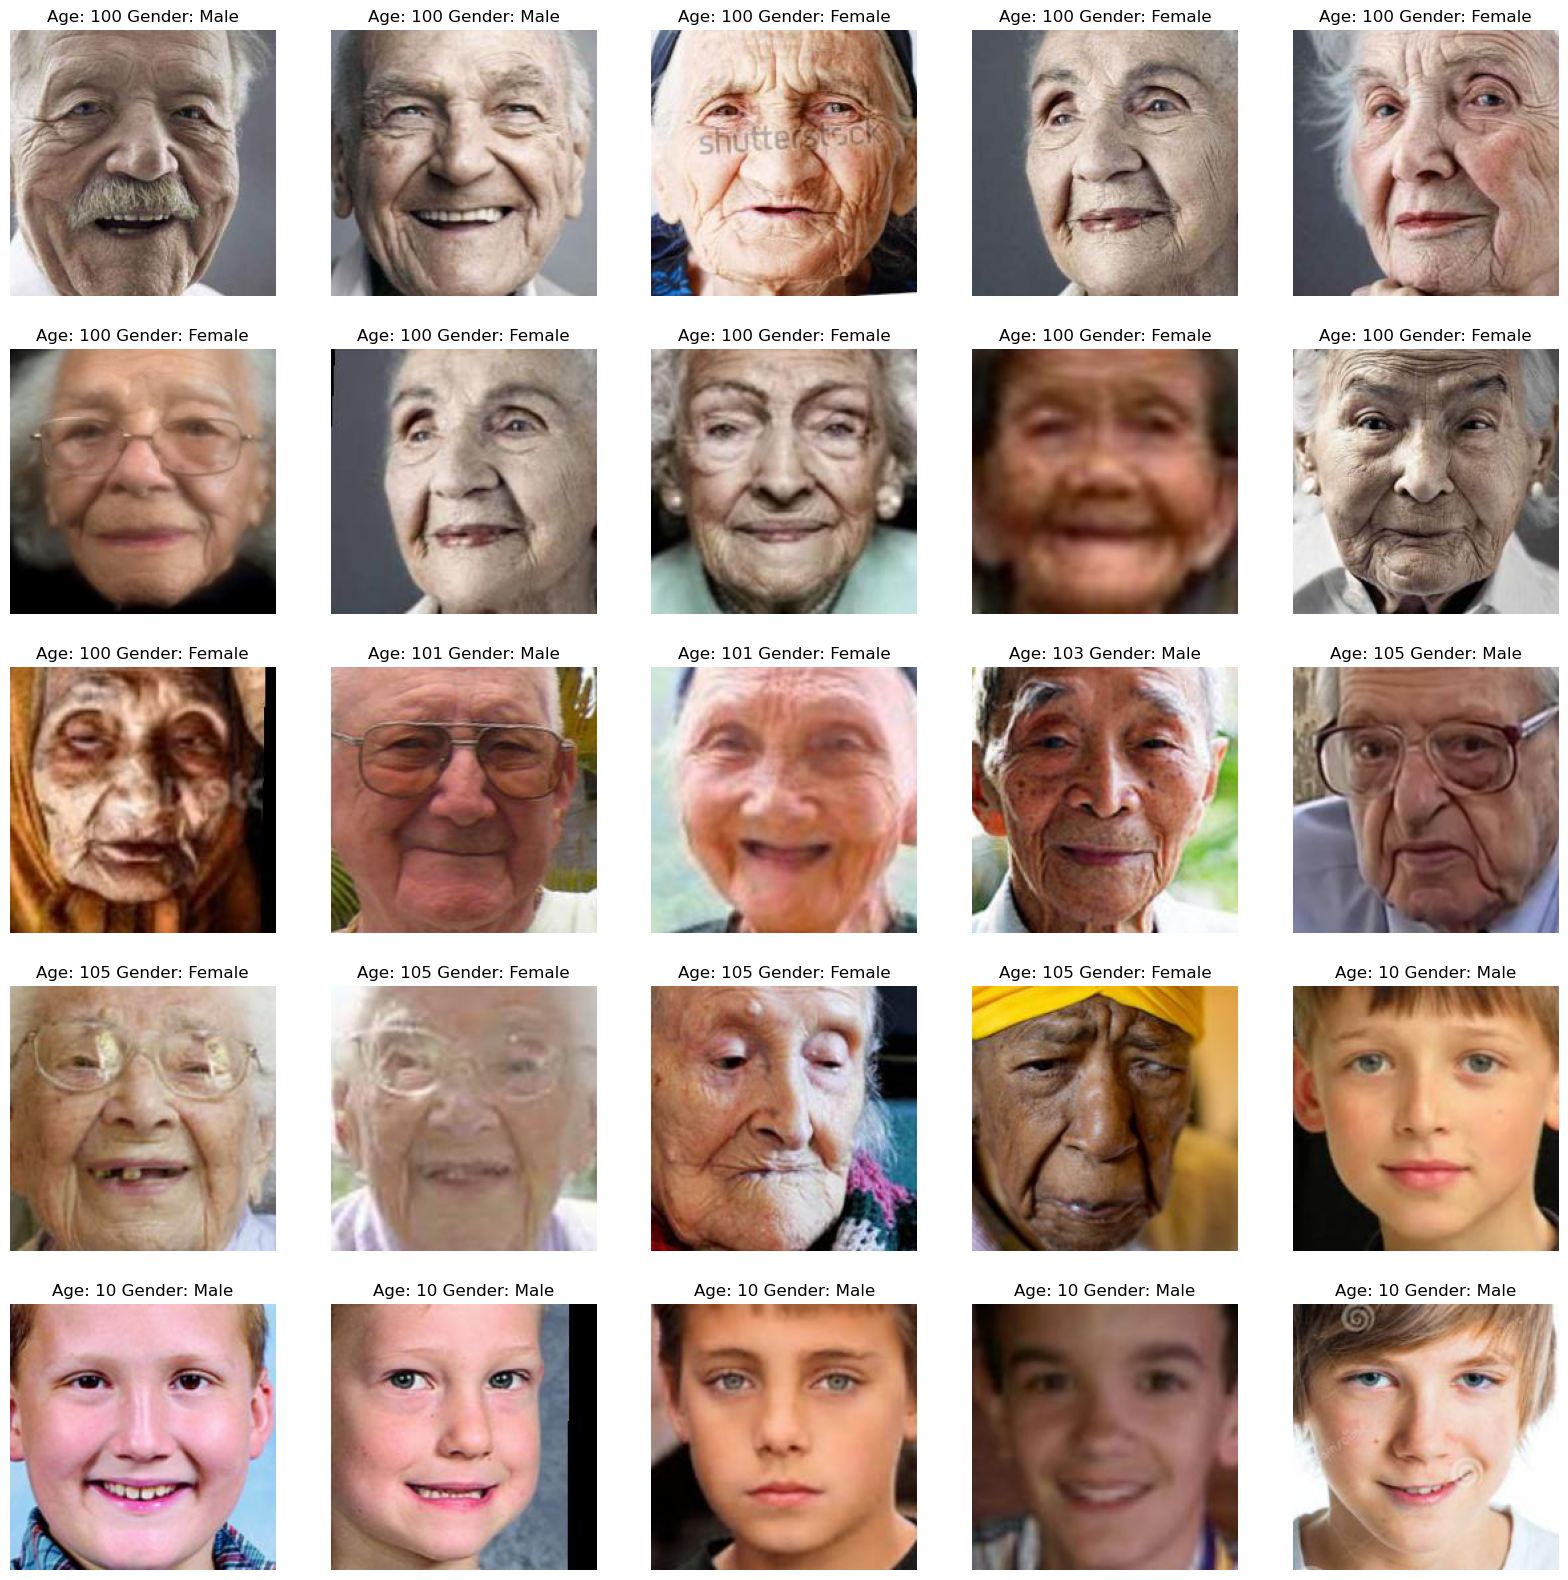

In [9]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

### Feature Extraction


In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [11]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128))  # Remove `Image.ANTIALIAS`
        img = np.array(img)
        features.append(img)
    
    return np.array(features)

# Apply the function
X = extract_features(df['image'])
 

100%|████████████████████████████████████████████████████████████████████████████| 23708/23708 [04:50<00:00, 81.47it/s]


In [12]:
import PIL
print(PIL.__version__)


10.2.0


In [13]:
X = extract_features(df['image'])

100%|███████████████████████████████████████████████████████████████████████████| 23708/23708 [01:09<00:00, 339.99it/s]


In [14]:
print(X.shape)  # Should print (num_images, 128, 128)


(23708, 128, 128)


In [15]:
# normalize the images
X = X/255.0

In [16]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [17]:
input_shape = (128, 128, 1)


### Model Creation

In [18]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.4) (dense_1)
dropout_2 = Dropout(0.4) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

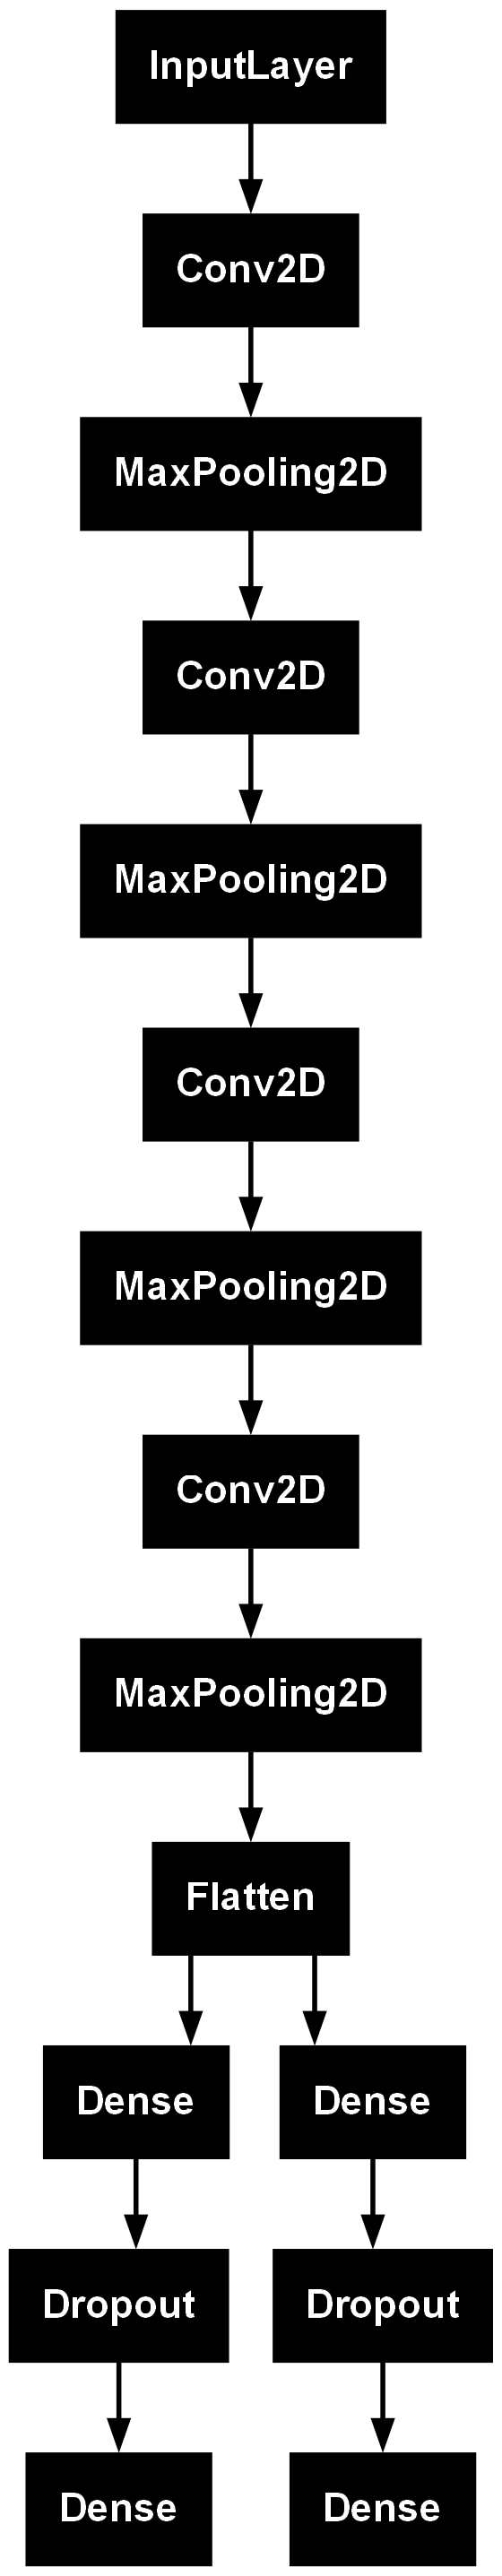

In [28]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [22]:
!pip install pydot

In [20]:
!pip install pydot graphviz

In [24]:
!conda install -c conda-forge graphviz -y
!conda install -c conda-forge pydot -y


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\chiduralas\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.1.31  |       h56e8100_0         155 KB  conda-forge
    cairo-1.18.0               |       h1fef639_0         1.4 MB  conda-forge
    certifi-2025.1.31          |     pyhd8ed1ab_0         159 KB  conda-forge
    conda-24.1.2               |  py311h1ea47a8_0         1.2 MB  conda-forge
    expat-2.6.4                |       he0c23c2_0         225 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-u



==> WARNING: A newer version of conda exists. <==
    current version: 24.1.2
    latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




In [25]:
import graphviz
print(graphviz.__version__)


0.20.3


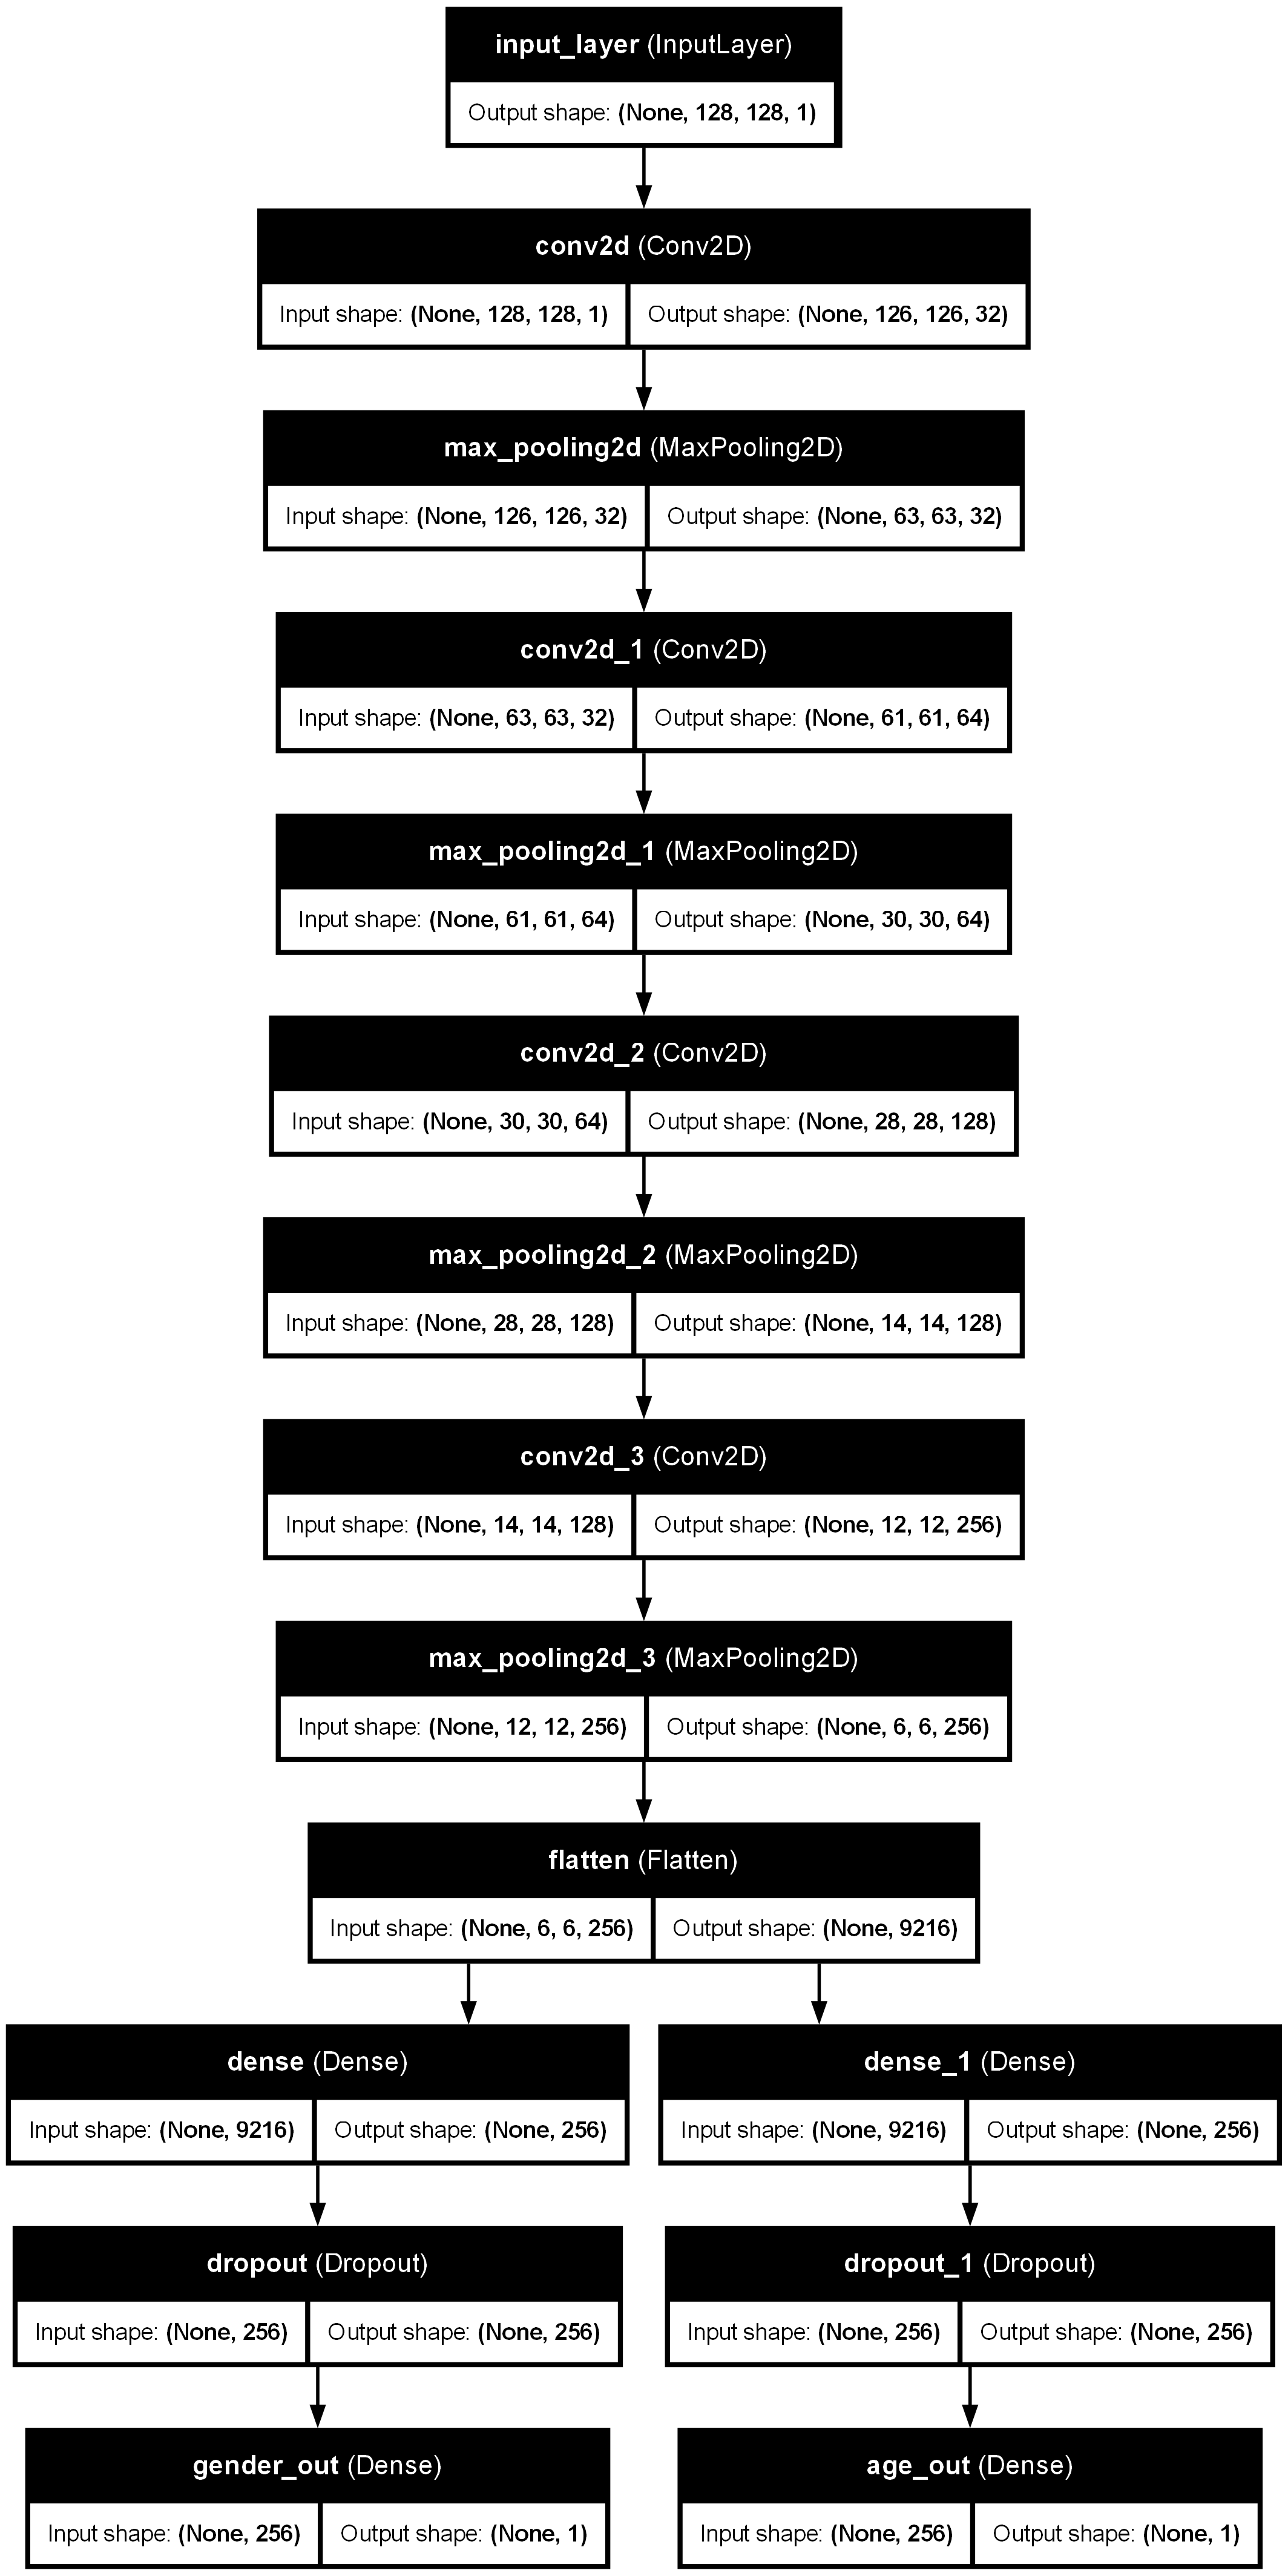

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)


In [29]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 267s 429ms/step - age_out_mae: 11.9749 - gender_out_accuracy: 0.5077 - loss: 12.6877 - val_age_out_mae: 36.0362 - val_gender_out_accuracy: 0.5858 - val_loss: 36.6813
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 251s 423ms/step - age_out_mae: 8.3270 - gender_out_accuracy: 0.7241 - loss: 8.8579 - val_age_out_mae: 30.6237 - val_gender_out_accuracy: 0.7596 - val_loss: 31.1261
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 196s 330ms/step - age_out_mae: 7.2076 - gender_out_accuracy: 0.8185 - loss: 7.5964 - val_age_out_mae: 29.4030 - val_gender_out_accuracy: 0.7727 - val_loss: 29.8742
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 187s 315ms/step - age_out_mae: 6.5494 - gender_out_accuracy: 0.8445 - loss: 6.8911 - val_age_out_mae: 24.8272 - val_gender_out_accuracy: 0.7754 - val_loss: 25.2810
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 180s 303ms/step - age_out_mae: 6.3135 - gender_out_accuracy: 0.8616 - loss: 6.6295 - val_age_out_mae: 26.9284 - val_gender_out_accuracy: 0.792

### Plot the results

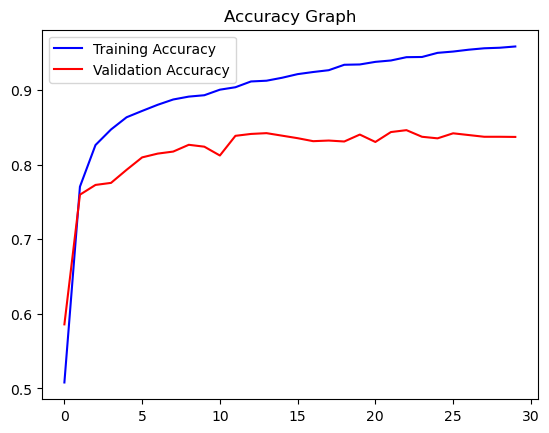

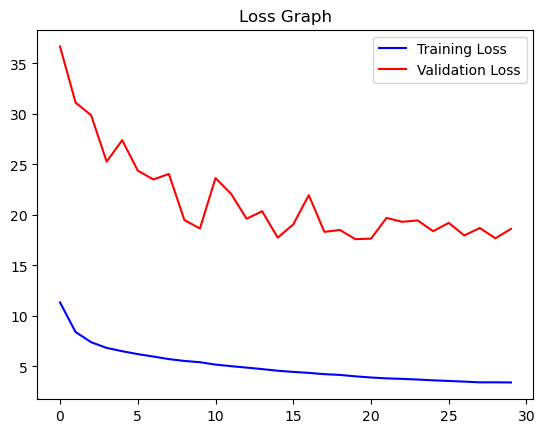

In [30]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

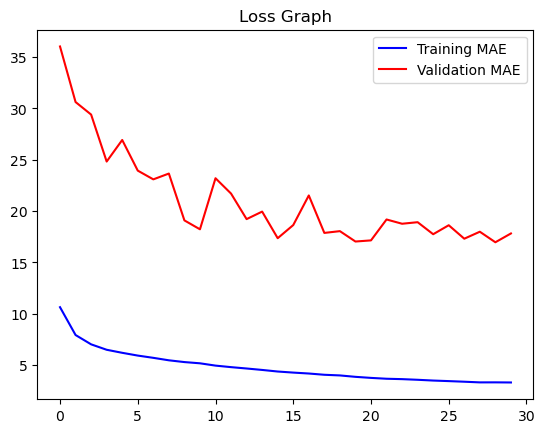

In [31]:
# plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()

### Prediction with Test Data

Original Gender: Male Original Age: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
Predicted Gender: Male Predicted Age: 8


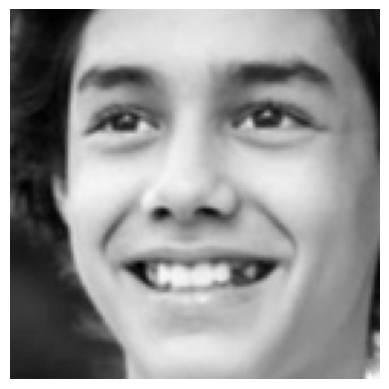

In [32]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Gender: Male Predicted Age: 21


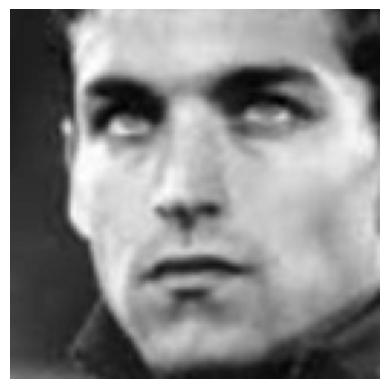

In [33]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Gender: Female Predicted Age: 31


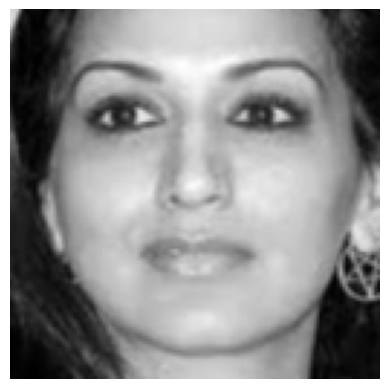

In [34]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [10]:
BASE_DIR = "UTKFace"  # Use your correct dataset path

# List a few image filenames
print(os.listdir(BASE_DIR)[:10])  # Show first 10 files


['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg', '100_1_0_20170112213001988.jpg.chip.jpg', '100_1_0_20170112213303693.jpg.chip.jpg', '100_1_0_20170112215032192.jpg.chip.jpg', '100_1_0_20170117195420803.jpg.chip.jpg', '100_1_0_20170119212053665.jpg.chip.jpg', '100_1_2_20170105174847679.jpg.chip.jpg', '100_1_2_20170112213615815.jpg.chip.jpg']


In [12]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    if filename.endswith(".jpg"):  # Ensure it's an image
        image_path = os.path.join(BASE_DIR, filename)
        temp = filename.split("_")
        
        try:
            age = int(temp[0])      # Extract age
            gender = int(temp[1])   # Extract gender (0 = Male, 1 = Female)
            
            image_paths.append(image_path)
            age_labels.append(age)
            gender_labels.append(gender)
        except:
            print(f"Skipping file: {filename} (Invalid format)")



100%|████████████████████████████████████████████████████████████████████████| 23708/23708 [00:00<00:00, 138207.58it/s]


In [13]:
def extract_features(image_paths):
    features = []
    
    for image_path in tqdm(image_paths):
        img = load_img(image_path, color_mode='rgb', target_size=(128, 128))
        img = img_to_array(img) / 255.0  # Normalize pixels to 0-1
        features.append(img)
    return np.array(features)
# Convert images to NumPy arrays
X = extract_features(image_paths)


100%|████████████████████████████████████████████████████████████████████████████| 23708/23708 [05:41<00:00, 69.52it/s]


In [14]:
from tensorflow.keras.utils import to_categorical

# Normalize age (between 0 and 1)
y_age = np.array(age_labels) / 116.0  # Max age is 116

# One-hot encode gender labels
y_gender = to_categorical(gender_labels, num_classes=2)

In [15]:
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(
    X, y_age, y_gender, test_size=0.2, random_state=42
)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    
    # Output layers
    layers.Dense(1, activation="linear", name="age_output"),  # Age Regression
    layers.Dense(2, activation="softmax", name="gender_output")  # Gender Classification
])

# Compile the model
model.compile(
    optimizer="adam",
    loss={"age_output": "mse", "gender_output": "categorical_crossentropy"},
    metrics={"age_output": "mae", "gender_output": "accuracy"}
)

# Display model summary
model.summary()

C:\Users\chiduralas\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ age_output (Dense)                   │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gender_output (Dense)                │ (None, 2)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,773 (12.61 MB)

 Trainable params: 3,304,773 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
img_size = (64, 64)


In [29]:
batch_size = 16


In [34]:
import pandas as pd
import os

BASE_DIR = r"C:\Users\chiduralas\Desktop\CHINKY\mounya\archive\UTKFace"

# List all image files
image_paths = []
age_labels = []
gender_labels = []

for filename in os.listdir(BASE_DIR):
    if filename.endswith(".jpg"):  # Ensure it's an image file
        parts = filename.split("_")
        try:
            age = int(parts[0])  # Extract age
            gender = int(parts[1])  # Extract gender (0=Male, 1=Female)

            image_paths.append(os.path.join(BASE_DIR, filename))
            age_labels.append(age)
            gender_labels.append(gender)
        except:
            print(f"Skipping file: {filename} (Invalid format)")

# Create DataFrame
df = pd.DataFrame({"image": image_paths, "age": age_labels, "gender": gender_labels})
df.head()  # View first few records


image  age  gender
0  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       0
1  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       0
2  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       1
3  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       1
4  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...  100       1

In [38]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print("Training Samples:", len(train_df))
print("Validation Samples:", len(val_df))


Training Samples: 18966
Validation Samples: 4742


In [43]:
# Convert gender labels to string format
train_df["gender"] = train_df["gender"].astype(str)
val_df["gender"] = val_df["gender"].astype(str)


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
img_size = (128, 128)
batch_size = 32

# Data generators for age and gender
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator for age
train_age_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image",
    y_col="age",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="raw"  # "raw" is used for regression (age prediction)
)

# Training generator for gender
train_gender_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image",
    y_col="gender",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"  # "binary" is used for gender classification
)

# Validation generator for age
val_age_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image",
    y_col="age",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="raw"
)

# Validation generator for gender
val_gender_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image",
    y_col="gender",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)


Found 18966 validated image filenames.
Found 18966 validated image filenames belonging to 2 classes.
Found 4742 validated image filenames.
Found 4742 validated image filenames belonging to 2 classes.


In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model
inputs = layers.Input(shape=(128, 128, 3))

x = layers.Conv2D(32, (3,3), activation="relu")(inputs)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(64, (3,3), activation="relu")(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(128, (3,3), activation="relu")(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)

# Output layers
age_output = layers.Dense(1, activation="linear", name="age_output")(x)  # Regression for Age
gender_output = layers.Dense(1, activation="sigmoid", name="gender_output")(x)  # Classification for Gender

# Create model with two outputs
model = models.Model(inputs=inputs, outputs=[age_output, gender_output])

# Compile the model
model.compile(
    optimizer="adam",
    loss={"age_output": "mse", "gender_output": "binary_crossentropy"},
    metrics={"age_output": "mae", "gender_output": "accuracy"}
)

# Model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 126, 126,  │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 63, 63,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 61, 61,    │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 30, 30,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_7[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 14, 14,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 25088)     │          0 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │  3,211,392 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │        129 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 1)         │        129 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
print(train_df.head())  # Should display image paths & labels
print(val_df.head())  # Should display image paths & labels


                                                   image  age gender
5096   C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   25      0
19586  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   56      0
9835   C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   29      1
13631  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   35      1
9807   C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   29      1
                                                   image  age gender
17525  C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   49      1
1147   C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   17      1
1190   C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   17      1
9731   C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   29      0
7387   C:\Users\chiduralas\Desktop\CHINKY\mounya\arch...   26      1


In [47]:
y_age_train = np.array(y_age_train)
y_gender_train = np.array(y_gender_train)

y_age_test = np.array(y_age_test)
y_gender_test = np.array(y_gender_test)


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure gender column is in string format
train_df["gender"] = train_df["gender"].astype(str)
val_df["gender"] = val_df["gender"].astype(str)

# Define image size and batch size
img_size = (128, 128)
batch_size = 32

# Data generators for age and gender
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator for age
train_age_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image",
    y_col="age",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="raw"
)

# Validation generator for age
val_age_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image",
    y_col="age",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="raw"
)


Found 18966 validated image filenames.
Found 4742 validated image filenames.


In [54]:
batch = next(iter(train_age_gen))  # Load one batch
print("Batch shape:", batch[0].shape)  # Should print (batch_size, 128, 128, 3)
print("Age labels shape:", batch[1].shape)  # Should match batch_size


Batch shape: (32, 128, 128, 3)
Age labels shape: (32,)
